<function matplotlib.pyplot.show(close=None, block=None)>

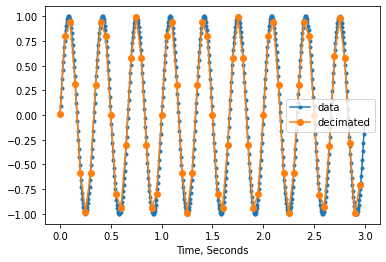

In [13]:
import numpy as np
import scipy as sc
from scipy import signal
import matplotlib.pyplot as plt
import rheosys as rhs



#sampling time settings
wave_duration = 3
sample_rate = 200
freq = 3
q_factor = 10
samples = wave_duration*sample_rate
samples_decimated = int(samples/q_factor)

#Frequency input selection from rheosys
x_exact = np.linspace(0, wave_duration, samples, endpoint=False)
y_exact = np.sin(x_exact*np.pi*freq*2)


#Sampling frequency to time vector use of scipy DECIMATE
x_vect_time = np.linspace(0, wave_duration, samples_decimated, endpoint=False)
y_vect_time = signal.decimate(y_exact,q_factor,)


#Figure plot of the corresponding fr
plt.plot(x_exact, y_exact, '.-', x_vect_time, y_vect_time, 'o-')
plt.xlabel('Time, Seconds')
plt.legend(['data', 'decimated'], loc='best')
plt.show


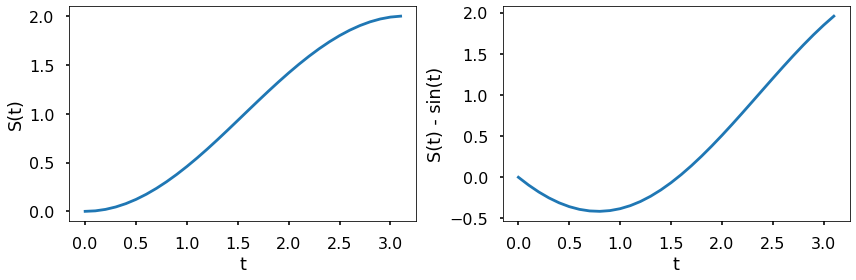

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import rheosys as rhs

plt.style.use('seaborn-poster')


F = lambda t, s: np.sin(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

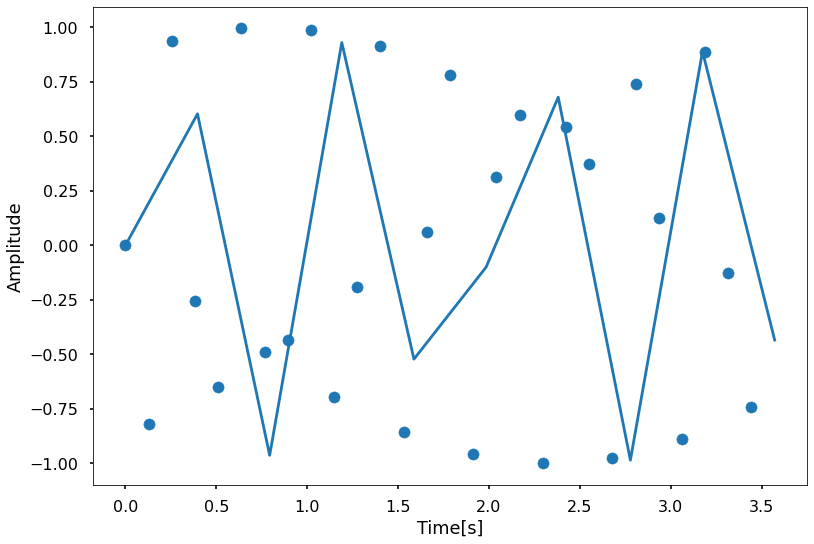

In [80]:
import matplotlib.pylab as plt
import numpy as np



f0=60                                       # f0 = excitation wave frequency [Hz]

N=100                                        # N = number of samples
Fs=28                                       # Fs = sampling frequency [Hz]

dt = 1/Fs                                   # Sampling period [s]
T = N*dt                                    # Record window duration [s]
t = np.linspace(0,T,Fs,endpoint=False)   # Time vector for sampling [s]

# generate samples at the specified times
y = np.sin(2*np.pi*f0*t); # [signal units]
t2=np.linspace(0,T,10)

plt.plot(t2,np.sin(2*np.pi*t2))
plt.scatter(t, y)
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.show()

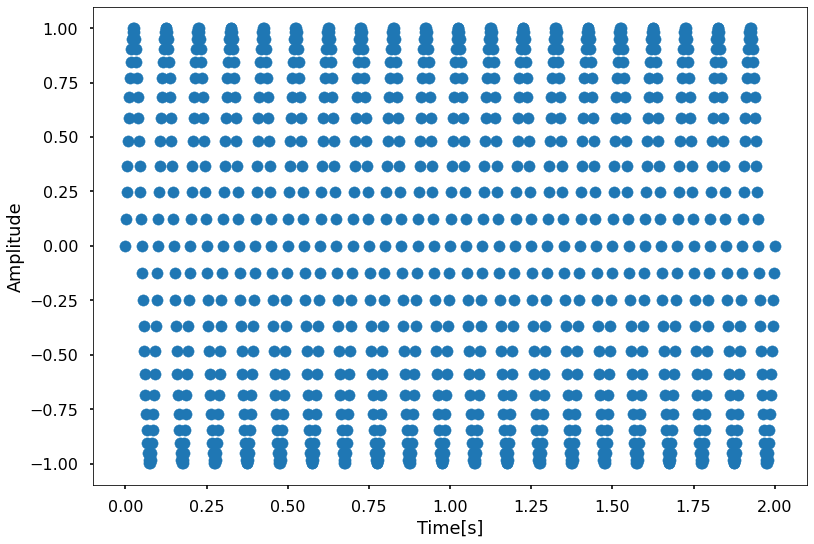

In [173]:
import numpy as np


def u_continuous(time):
    u=np.sin(time)
    return u


def u_sampling (excitation_frequency,sample_frequency,sample_time):
    f0=excitation_frequency                     # f0 = excitation wave frequency [Hz]
    Fs=sample_frequency                         # Fs = sampling frequency [Hz]
    T=sample_time                               # Record window duration [s]

    dt = 1/Fs                                   # Sampling period [s]
    t = np.arange(0,T+dt,dt)   # Time vector for sampling [s]

    # generate samples at the specified times
    u_sampled = np.sin(2*np.pi*f0*t); # [signal units]

    return (t,u_sampled)

#run the function
u,time= u_sampling(10,500,2)
t_test=np.arange(0,10,0.0002)
u2=u_continuous(t_test)

plt.scatter(u,time)
#plt.plot(t_test,u2)
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.show()



<class 'numpy.ndarray'> [ 0.00000000e+00 -7.07106781e-01 -1.00000000e+00 -7.07106781e-01
  5.38968388e-15  7.07106781e-01  1.00000000e+00  7.07106781e-01
 -1.07793678e-14 -7.07106781e-01 -1.00000000e+00 -7.07106781e-01
  3.03799063e-14  7.07106781e-01  1.00000000e+00  7.07106781e-01
 -2.15587355e-14]
<class 'float'> 0.125
<class 'int'> 2
0.0


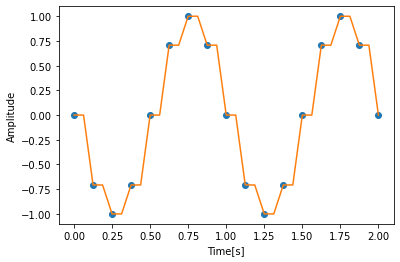

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from math import floor

def u_continuous(time):
    u=np.sin(time)
    return u


def u_sampling (excitation_frequency,sample_frequency,sample_time):
    f0=excitation_frequency                     # f0 = excitation wave frequency [Hz]
    Fs=sample_frequency                         # Fs = sampling frequency [Hz]
    T=sample_time                               # Record window duration [s]

    dt = 1/Fs                                   # Sampling period [s]
    t = np.arange(0,T+dt,dt)   # Time vector for sampling [s]

    # generate samples at the specified times
    u_sampled = np.sin(2*np.pi*f0*t); # [signal units]

    return (u_sampled,t)


f_excitation=15
f_sample=8
T_sample=1/f_sample
T_total=2


#run the function
u_d,time= u_sampling(f_excitation,f_sample,T_total)

#print(u_d)

print(type(u_d),u_d)
print(type(T_sample),T_sample)
print(type(T_total),T_total)

def DAC_0 (u_discrete,sample_time,x):
    u_test=u_discrete[floor(sample_time/x)]

    return u_test


print(DAC_0(u_d,T_sample,28))

t = np.arange(0,T_total+T_sample,T_sample)
t2 = np.arange(0,T_total+(T_sample/2),T_sample/2)

# Calculating the Discrete to Analog by interpolation between the sampled points
# This interpolation can adress the orders 0 to 2 and every positive odd number
u_t=interp1d(t,u_d,kind=0)

x = t
y = u_d
xnew = t2
ynew = u_t(xnew)   # use interpolation function returned by `interp1d`


F = lambda t, s:ynew

t_eval = t
#sol = solve_ivp(F, t, [0])

plt.plot(x, y, 'o', xnew, ynew, '-')
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.show()


# theta''(t) + b*theta'(t) + c*sin(theta(t)) = 0




array([0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3., 4.,
       4., 4., 4.])

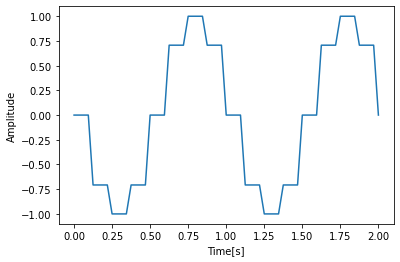

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from math import floor

def u_continuous(time):
    u=np.sin(time)
    return u


def u_sampling (excitation_frequency,sample_frequency,sample_time):
    f0=excitation_frequency                     # f0 = excitation wave frequency [Hz]
    Fs=sample_frequency                         # Fs = sampling frequency [Hz]
    T=sample_time                               # Record window duration [s]

    dt = 1/Fs                                   # Sampling period [s]
    t = np.arange(0,T+dt,dt)   # Time vector for sampling [s]

    # generate samples at the specified times
    u_sampled = np.sin(2*np.pi*f0*t); # [signal units]

    return (u_sampled,t)


f_excitation=15
f_sample=8
T_sample=1/f_sample
T_total=2


#run the function
u_d,time= u_sampling(f_excitation,f_sample,T_total)



def DAC_0(u_discrete,sample_time,time_range):
    u_test=[]
    for i in range(len(time_range)):
        x=int(time_range[i]//sample_time)
        u_test.append(u_discrete[x])
    return np.array(u_test)


t2 = np.arange(0,T_total+(T_sample/4),T_sample/4)
u_t=DAC_0(u_d,T_sample,t2)


plt.plot(t2,u_t,'-')
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.axis('tight')
#plt.show()

def b(x): return x//2
#print(np.arange(0,10,0.5)//2)
b(np.arange(0,10,0.5))

#print(u_d[5])


